In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Superstore%20Dataset/Sample%20-%20Superstore.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df['OrderY']=df['Order Date'].dt.year
df['OrderM']=df['Order Date'].dt.month
df['OrderD']=df['Order Date'].dt.day
df['Profitability']=df['Profit']/df['Sales']

<AxesSubplot:xlabel='Country'>

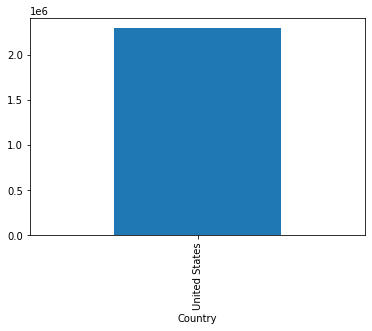

In [7]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(20).plot.bar()

<AxesSubplot:xlabel='State'>

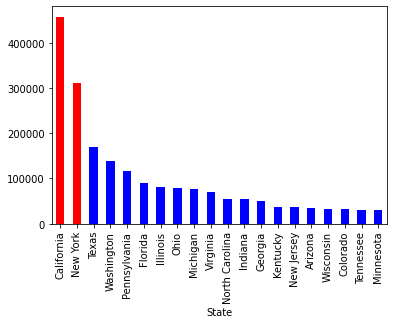

In [8]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue']
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

<AxesSubplot:xlabel='State'>

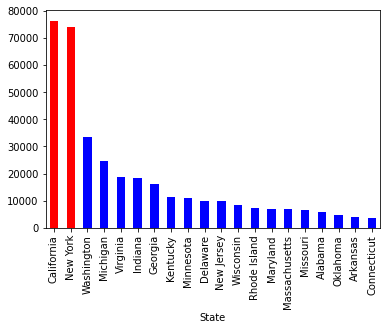

In [9]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue']
df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

In [10]:
df_cal=df[df['State']=='California']
df_new=df[df['State']=='New York']

(-1000.0, 5000.0)

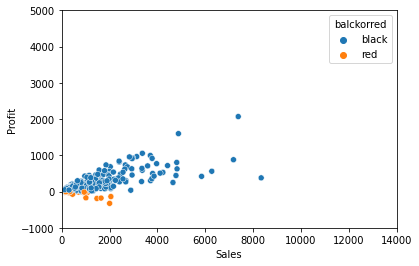

In [11]:
df_cal_customer=pd.DataFrame(df_cal.groupby('Customer Name')['Sales'].sum())
df_cal_customer['Profit']=pd.DataFrame(df_cal.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_cal_customer.loc[:,'balckorred']=df_cal_customer.loc[:,'Profit'].apply(type)


sns.scatterplot(data=df_cal_customer, hue='balckorred',x='Sales',y='Profit')
plt.xlim(0, 14000)
plt.ylim(-1000, 5000)

(-1000.0, 5000.0)

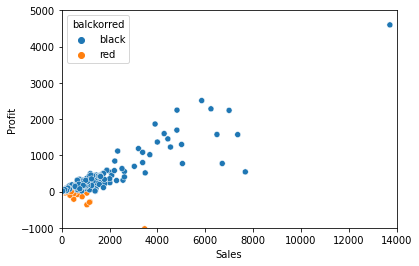

In [12]:
df_new_customer=pd.DataFrame(df_new.groupby('Customer Name')['Sales'].sum())
df_new_customer['Profit']=pd.DataFrame(df_new.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_new_customer.loc[:,'balckorred']=df_new_customer.loc[:,'Profit'].apply(type)


sns.scatterplot(data=df_new_customer, hue='balckorred',x='Sales',y='Profit')
plt.xlim(0, 14000)
plt.ylim(-1000, 5000)

In [13]:
df_new_customer.sort_values(by=['Sales'],ascending=False).head()

,Sales,Profit,balckorred
Customer Name,,,
Tom Ashbrook,13723.498,4599.2073,black
Peter Fuller,7678.228,543.2819,black
Seth Vernon,7359.918,1571.7964,black
Tom Boeckenhauer,6999.960,2239.9872,black
Greg Tran,6712.744,774.7935,black


In [14]:
df_cal_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,577.0,793.219465,1089.711102,3.984,110.0120,387.136,1059.0880,8341.2900
Profit,577.0,132.376754,210.395948,-325.572,18.4527,63.621,147.1346,2069.6196


In [15]:
df_new_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,415.0,749.099448,1345.445710,3.6400,70.21400,311.4220,795.3050,13723.4980
Profit,415.0,178.406141,413.540179,-1027.4035,15.13285,56.6044,172.9244,4599.2073


In [16]:
df_new_noTom=df_new_customer[df_new_customer.index != 'Tom Ashbrook']
df_new_noTom.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,414.0,717.760321,1185.762163,3.6400,70.213000,310.89300,789.35200,7678.2280
Profit,414.0,167.727878,352.128496,-1027.4035,15.129825,56.51905,172.26315,2510.8903


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

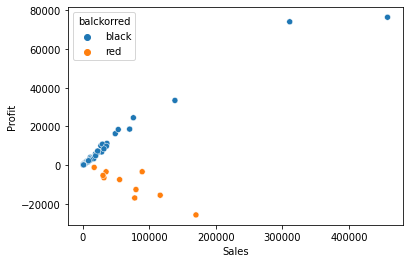

In [17]:
df_state=pd.DataFrame(df.groupby('State')['Sales'].sum())
df_state['Profit']=pd.DataFrame(df.groupby('State')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_state.loc[:,'balckorred']=df_state.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_state, hue='balckorred',x='Sales',y='Profit')

<AxesSubplot:xlabel='City'>

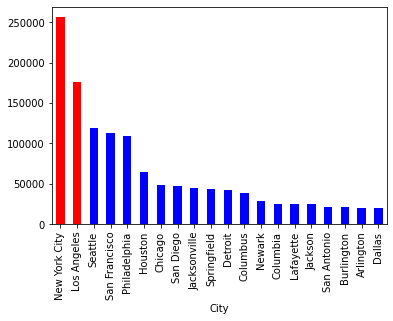

In [18]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue']
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

<AxesSubplot:xlabel='City'>

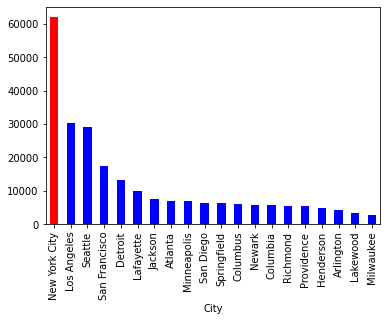

In [19]:
colors = ['red', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue']
df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

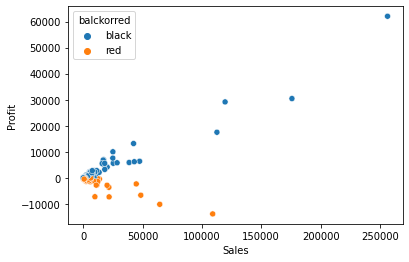

In [20]:
df_city=pd.DataFrame(df.groupby('City')['Sales'].sum())
df_city['Profit']=pd.DataFrame(df.groupby('City')['Profit'].sum())
def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_city.loc[:,'balckorred']=df_city.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_city, hue='balckorred',x='Sales',y='Profit')

<AxesSubplot:xlabel='Customer Name'>

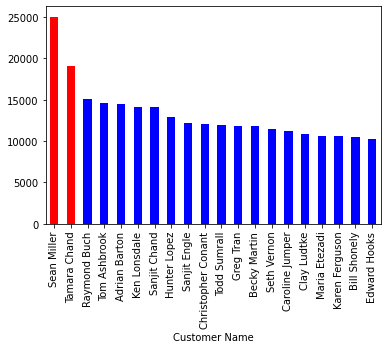

In [21]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue']
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

<AxesSubplot:xlabel='Customer Name'>

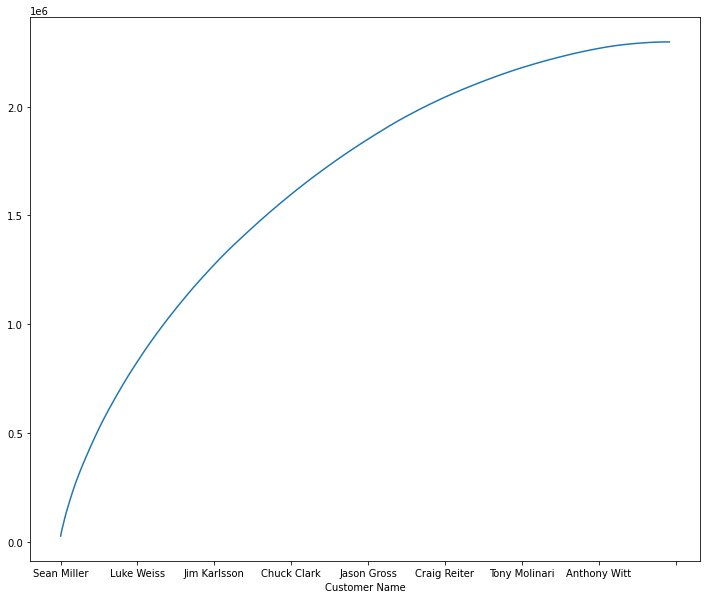

In [22]:
plt.figure(figsize=(12,10))
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).cumsum().plot()

In [23]:
df1=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False))
df1.quantile(0.7, interpolation='higher')

Sales    3288.11
Name: 0.7, dtype: float64

In [24]:
df1[df1['Sales']>=3288.11].sum()/df['Sales'].sum()

Sales    0.609223
dtype: float64

<AxesSubplot:xlabel='Customer Name'>

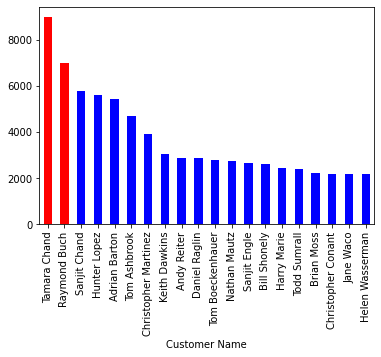

In [25]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue']
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

<AxesSubplot:xlabel='Customer Name'>

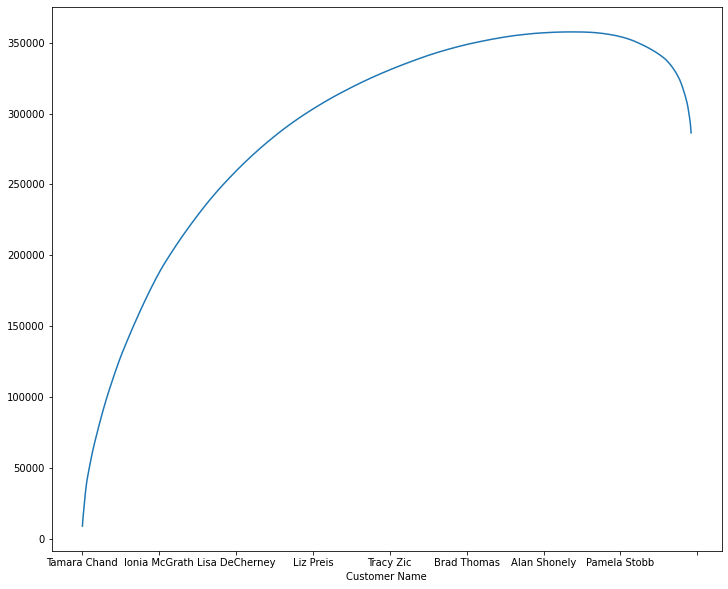

In [26]:
plt.figure(figsize=(12,10))
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).cumsum().plot()

In [27]:
df2=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))
df2.quantile(0.7, interpolation='higher')

Profit    463.269
Name: 0.7, dtype: float64

In [28]:
df2[df2['Profit']>=463.269].sum()/df['Profit'].sum()

Profit    0.971351
dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

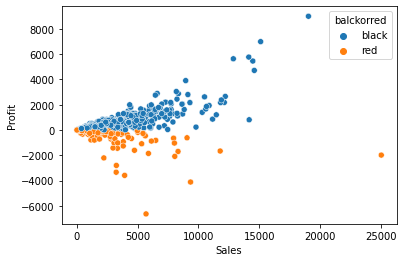

In [29]:
df_customer=pd.DataFrame(df.groupby('Customer Name')['Sales'].sum())
df_customer['Profit']=pd.DataFrame(df.groupby('Customer Name')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_customer.loc[:,'balckorred']=df_customer.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_customer, hue='balckorred',x='Sales',y='Profit')

<AxesSubplot:xlabel='Category'>

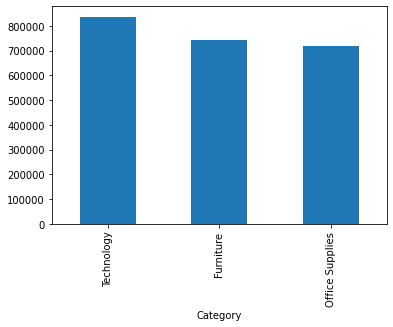

In [30]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='Category'>

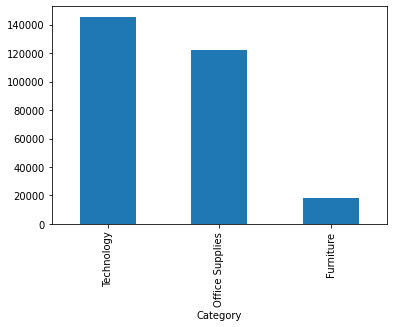

In [31]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

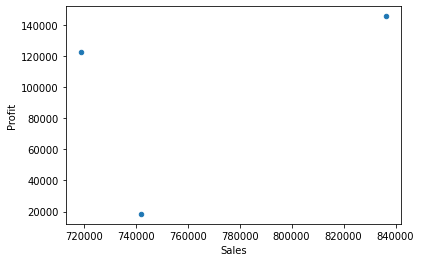

In [32]:
df_category=pd.DataFrame(df.groupby('Category')['Sales'].sum())
df_category['Profit']=pd.DataFrame(df.groupby('Category')['Profit'].sum())
df_category.plot.scatter(x='Sales',y='Profit')

<AxesSubplot:xlabel='Sub-Category'>

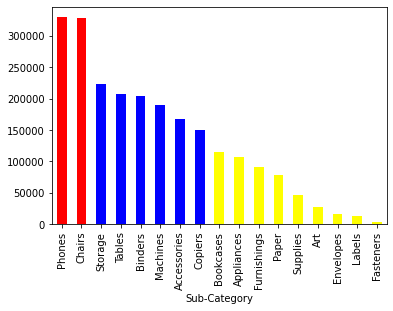

In [33]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=colors)

<AxesSubplot:xlabel='Sub-Category'>

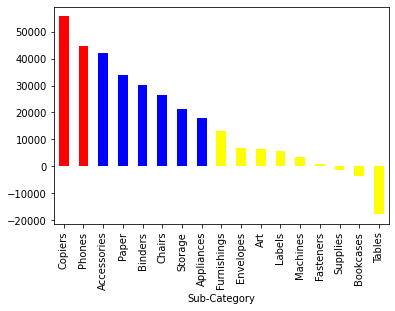

In [34]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','yellow','yellow','yellow']
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=colors)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

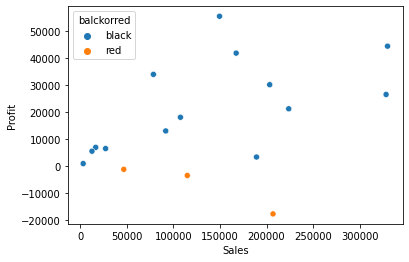

In [35]:
df_subcategory=pd.DataFrame(df.groupby('Sub-Category')['Sales'].sum())
df_subcategory['Profit']=pd.DataFrame(df.groupby('Sub-Category')['Profit'].sum())

def type(ex):
    if ex <0:
        return 'red'
    else:
        return 'black'

df_subcategory.loc[:,'balckorred']=df_subcategory.loc[:,'Profit'].apply(type)

sns.scatterplot(data=df_subcategory, hue='balckorred',x='Sales',y='Profit')

<AxesSubplot:xlabel='OrderY'>

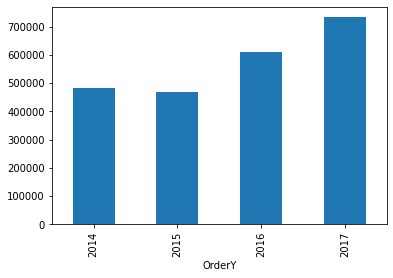

In [36]:
df.groupby('OrderY')['Sales'].sum().plot.bar()

<AxesSubplot:xlabel='OrderY'>

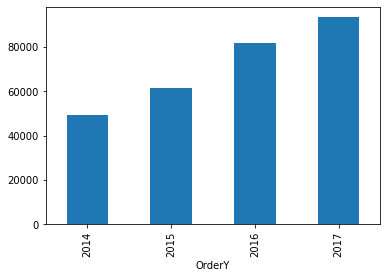

In [37]:
df.groupby('OrderY')['Profit'].sum().plot.bar()

<AxesSubplot:xlabel='OrderY,OrderM'>

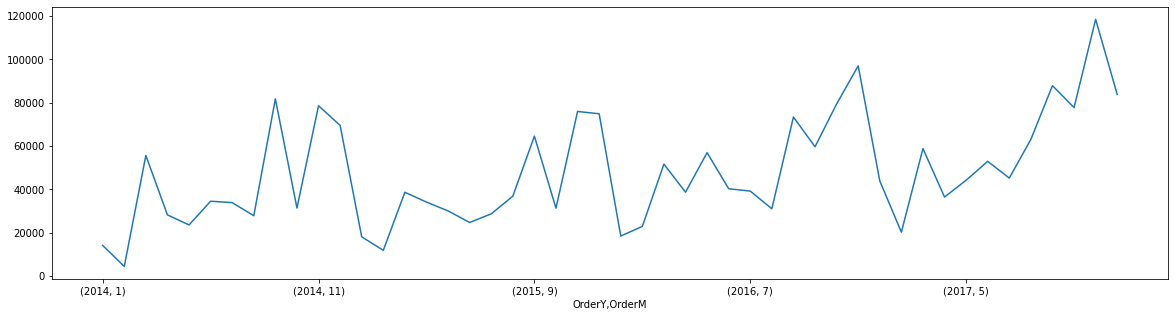

In [38]:
plt.figure(figsize=(20,5))
df.groupby(['OrderY','OrderM'])['Sales'].sum().plot()

<AxesSubplot:xlabel='OrderY,OrderM'>

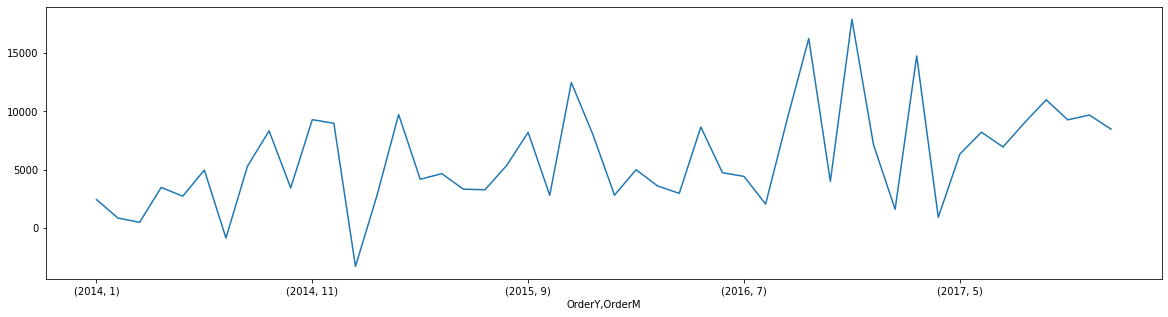

In [39]:
plt.figure(figsize=(20,5))
df.groupby(['OrderY','OrderM'])['Profit'].sum().plot()